In [12]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly

In [13]:
data = pd.read_excel("../Dataset.xlsx", sheet_name=['Weather', 'Total Consumers'])
df_tc = data['Total Consumers']
df_w = data['Weather']

In [14]:
df_merged = pd.concat([df_w['datetime'], df_tc[0].rename("energy")],axis=1)
df_merged['datetime'] = pd.to_datetime(df_merged['datetime'])
df_merged

,datetime,energy
0,2019-01-01 00:15:00,2.964
1,2019-01-01 00:30:00,2.584
2,2019-01-01 00:45:00,3.071
3,2019-01-01 01:00:00,2.694
4,2019-01-01 01:15:00,2.569
...,...,...
35131,NaT,1.664
35132,NaT,1.659
35133,NaT,1.664
35134,NaT,1.697


In [15]:
df_merged.dropna(inplace=True)
df_merged.reset_index(inplace=True, drop=True)
df_merged.rename(columns = {'datetime':'ds', 'energy': 'y'}, inplace = True)
df_merged

,ds,y
0,2019-01-01 00:15:00,2.964
1,2019-01-01 00:30:00,2.584
2,2019-01-01 00:45:00,3.071
3,2019-01-01 01:00:00,2.694
4,2019-01-01 01:15:00,2.569
...,...,...
12081,2019-05-17 23:00:00,2.821
12082,2019-05-17 23:15:00,3.031
12083,2019-05-17 23:30:00,2.279
12084,2019-05-17 23:45:00,2.580


In [16]:
model = Prophet()
model.fit(df_merged)

11:17:29 - cmdstanpy - INFO - Chain [1] start processing
11:17:35 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future = model.make_future_dataframe(periods=30)
future.tail()

,ds
12111,2019-06-13
12112,2019-06-14
12113,2019-06-15
12114,2019-06-16
12115,2019-06-17


In [18]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
12111,2019-06-13,3.499522,0.748651,6.359021
12112,2019-06-14,3.512103,0.603699,6.476135
12113,2019-06-15,3.166616,0.036072,6.448174
12114,2019-06-16,2.316624,-0.934802,5.533329
12115,2019-06-17,2.918536,-0.550636,6.185675


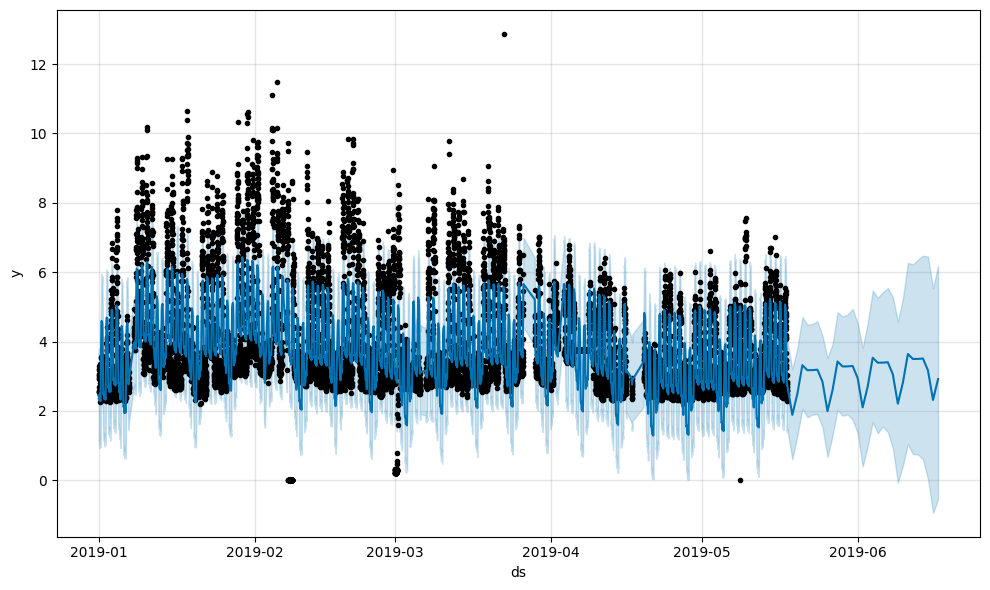

In [19]:
fig1 = model.plot(forecast)

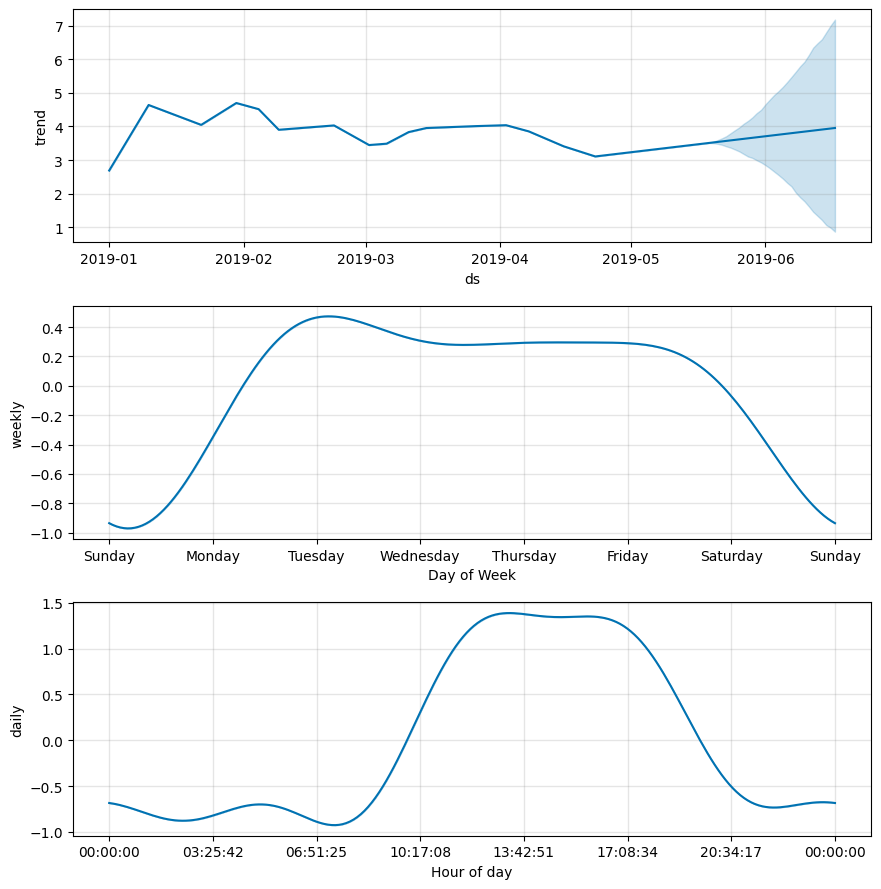

In [20]:
fig2 = model.plot_components(forecast)

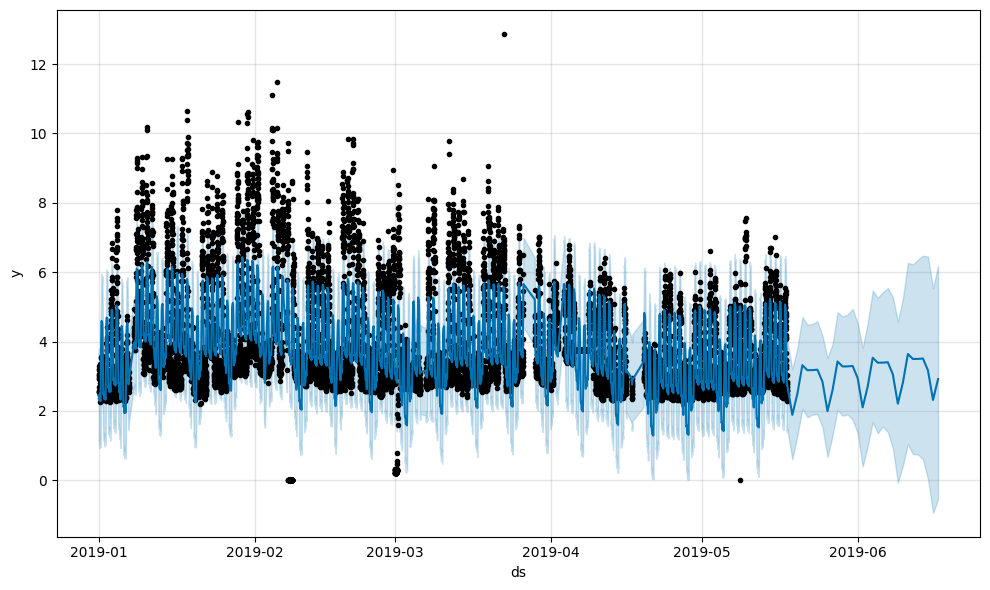

In [21]:
model.plot(forecast)
plt.show()